In [17]:
#Find optimum number of clusters from the given Iris data.

#Prediction using Unsupervised Machine Learning

We import and study the data.

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


data = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")
print(data.head(10))
print("Data imported successfully")
print(data.shape)

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
Data imported successfully
(150, 5)


finding more information about the data.

In [19]:
print(data.shape)
data.info()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are no null values, hence we can proceed. Now we should find the optimum number of clusters for KMeans classification.

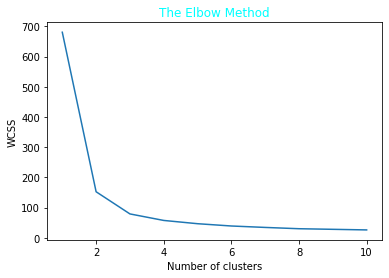

In [20]:
x = data.iloc[:, [0, 1, 2, 3]].values
wcss = []
n = range(1, 11)
for i in n:
    model: KMeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(x)
    wcss.append(model.inertia_)
    
plt.plot(n, wcss)
plt.title("The Elbow Method", color="cyan")
plt.xlabel("Number of clusters", color="k")
plt.ylabel("WCSS", color="k")
plt.show()

In the graph we find the elbow point, and we get that 3 optimum clusters can be created.

In [21]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = model.fit_predict(x)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Now we are visualizing the clusters and centroids. For the first two parameters.

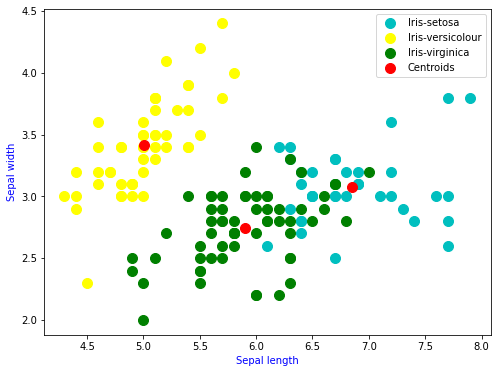

In [22]:
plt.figure(figsize=(8, 6))
plt.xlabel("Sepal length", size=10, color="b")
plt.ylabel("Sepal width", size=10, color="b")
# Plotting the clusters
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s=100, color='c', label='Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s=100, color='yellow', label='Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s=100, color='green', label='Iris-virginica')
# PLotting the Cemtroids of clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='r', label='Centroids')
plt.legend(loc="best")
plt.show()

Now let us visualize for the remaining two parameters of the data.

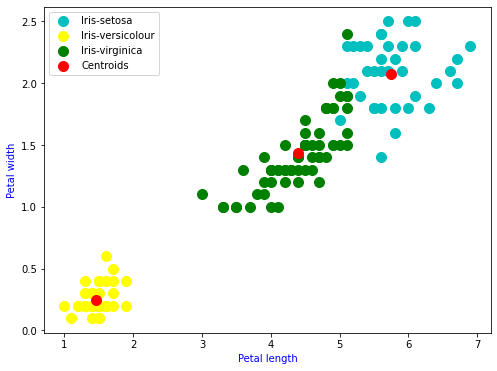

In [23]:
plt.figure(figsize=(8, 6))
plt.xlabel("Petal length", size=10, color="b")
plt.ylabel("Petal width", size=10, color="b")
# Plotting the clusters
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], s=100, color='c', label='Iris-setosa')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], s=100, color='yellow', label='Iris-versicolour')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3], s=100, color='green', label='Iris-virginica')
# PLotting the Cemtroids of clusters
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3], s=100, c='red', label='Centroids')
plt.legend(loc="best")
plt.show()

As the classification done by the model matches the real data, the model is a success.